## Example

In this simple example, we load an image, pre-process it, and classify it with a pretrained EfficientNet.

In [46]:
import json
from PIL import Image

import torch
from torchvision import transforms

from efficientnet_pytorch import EfficientNet

In [83]:
model_name = 'efficientnet-b0'
image_size = EfficientNet.get_image_size(model_name) # 224

In [84]:
# Open image
img = Image.open('img.jpg')
# img

In [85]:
# Preprocess image
tfms = transforms.Compose([transforms.Resize(image_size), transforms.CenterCrop(image_size), 
                           transforms.ToTensor(),
                           transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),])
img = tfms(img).unsqueeze(0)

In [86]:
# Load class names
labels_map = json.load(open('labels_map.txt'))
labels_map = [labels_map[str(i)] for i in range(1000)]
print(len(labels_map))

1000


In [93]:
def print_model(module, name="model", depth=0):
    if len(list(module.named_children())) == 0:
        print(f"{' ' * depth} {name}: {module}")
    else:
        print(f"{' ' * depth} {name}: {type(module)}")

    for child_name, child_module in module.named_children():
        if isinstance(module, torch.nn.Sequential):
            child_name = f"{name}[{child_name}]"
        else:
            child_name = f"{name}.{child_name}"
        print_model(child_module, child_name, depth + 1)
    

In [131]:
model = EfficientNet.from_pretrained(model_name)
endpoints = model.extract_endpoints(img)
image_tensors = []
image_tensors.extend(img.flatten().shape)
for endp in endpoints:
    image_tensors.extend(endpoints[endp].flatten().shape)


Loaded pretrained weights for efficientnet-b1


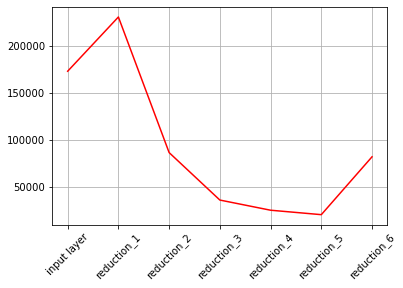

In [137]:
import matplotlib.pyplot as plt 
names = ["input layer"]
names.extend(list(endpoints.keys()))
plt.plot(names, image_tensors, color='red')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [53]:
# Classify with EfficientNet
model.eval() #dont activate "Batch Normalization and Dropout"
with torch.no_grad():#停止梯度的更新 Stop gradient renew 
    logits = model(img)
preds = torch.topk(logits, k=5).indices.squeeze(0).tolist()
# print(preds)
print('-----')
for idx in preds:
    label = labels_map[idx]
    prob = torch.softmax(logits, dim=1)[0, idx].item()
    print('{} {:<75} ({:.2f}%)'.format(idx, label, prob*100))

-----
388 giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca           (83.44%)
294 brown bear, bruin, Ursus arctos                                             (0.62%)
387 lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens         (0.60%)
296 ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus                 (0.44%)
279 Arctic fox, white fox, Alopex lagopus                                       (0.34%)
